In [463]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### Log(x) data with added noise

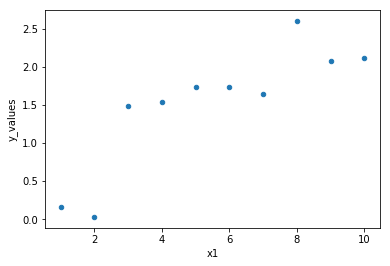

In [464]:
n_samples = 10

np.random.seed(2)
random_list = np.random.rand(n_samples)
noise = pd.Series(random_list)
noise -= np.mean(random_list)
data = pd.DataFrame(list(range(1,n_samples + 1)),columns=['x1'])
data['log_fit'] = np.log(data['x1'])
data['y_values'] = data['log_fit'] + noise*2
data.plot.scatter(x='x1', y='y_values')

### Add polynomials

In [465]:
data['x0'] = 1
data['x2'] = data['x1']**2
data['x3'] = data['x1']**3
data['x4'] = data['x1']**4
data['x5'] = data['x1']**5
data['x6'] = data['x1']**6

### Fit polynomial linear regression

In [466]:
features = ['x0','x1','x2','x3','x4','x5','x6']
X = data[features]
y = data['y_values']

X_transpose_X = X.transpose().dot(X)
inverse = np.linalg.inv(X_transpose_X)
X_transpose_y = X.transpose().dot(y)
coeffs = inverse.dot(X_transpose_y)
coeffs

array([ 8.64555836e+00, -1.69561756e+01,  1.14012130e+01, -3.42006144e+00,
        5.15196752e-01, -3.80477680e-02,  1.09576978e-03])

### Plot results (overfitting)

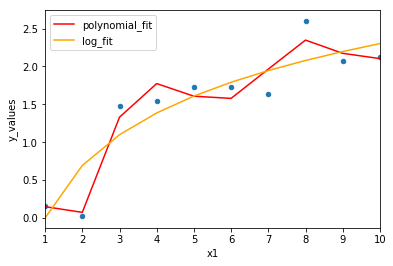

In [467]:
data['polynomial_fit'] = X.dot(coeffs)
ax = data.plot.scatter(x='x1', y='y_values')
data.plot(x='x1',y='polynomial_fit', ax=ax, color='red')
data.plot(x='x1',y= 'log_fit', ax=ax, color='orange')

## Perform linear regression with normalisation
coeffs = inverse(X_tranpose * X + lambda_rate * quasi_identity_matrix) * X_transpose * y

### Create quasi identity matrix needs for matrix regularziation

In [468]:
identity = np.identity(len(features))
identity[0,0] = 0
identity

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

### Fit polynomial with regularzation

In [469]:
lambda_regularise = 10 ** 2

X_transpose_X = X.transpose().dot(X)
inverse = np.linalg.inv(X_transpose_X + (lambda_regularise * identity))
X_transpose_y = X.transpose().dot(y)
coeffs = inverse.dot(X_transpose_y)
coeffs

array([ 2.78896390e-01,  7.00432444e-03,  2.30863771e-02,  3.75370487e-02,
       -1.05678040e-02,  1.02076407e-03, -3.44740655e-05])

### Plot results (better fit)

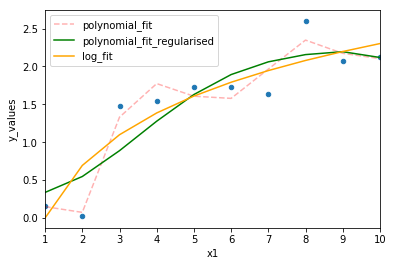

In [470]:
data['polynomial_fit_regularised'] = X.dot(coeffs)
ax = data.plot.scatter(x='x1', y='y_values')
data.plot(x='x1',y='polynomial_fit', ax=ax, style='r--', alpha=0.3)
data.plot(x='x1',y='polynomial_fit_regularised', ax=ax, color='green')
data.plot(x='x1',y= 'log_fit', ax=ax, color='orange')